TIMING: NILMTK converting mains to dataframe: 0.38
        (1, 1, REDD)   (2, 1, REDD)
count  522350.000000  522350.000000
mean      225.825592     166.655334
std       298.118195     356.352478
min        52.288334      37.410000
25%        94.490000      38.410000
50%       138.945007      39.501999
75%       297.170013     117.416664
max      5935.953125    6152.660156
                           (1, 1, REDD)  (2, 1, REDD)
2011-04-18 09:22:06-04:00    225.283340    118.889999
2011-04-18 09:22:12-04:00    222.601669    118.970001
2011-04-18 09:22:18-04:00    222.676666    119.063332
2011-04-18 09:22:24-04:00    222.350006    118.926666
2011-04-18 09:22:30-04:00    222.586670    118.790001
2011-04-18 09:22:36-04:00    224.878326    118.898331
2011-04-18 09:22:42-04:00    223.710007    118.963333
2011-04-18 09:22:48-04:00    224.688324    118.930000
2011-04-18 09:22:54-04:00    224.195007    118.996666
2011-04-18 09:23:00-04:00    226.350006    118.813332
                           (1, 

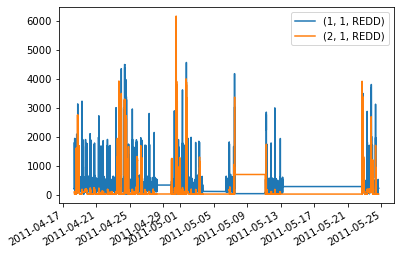

In [1]:
import sys
sys.path.append('../..')
from datasources.datasource import DatasourceFactory
import datasources.datasource
import utils.chaotic_toolkit as ct
import nilmlab.tstransformers as ts

appliances_redd3 = ['electric furnace', 'CE appliance', 'microwave', 'washer dryer', 'unknown', 'sockets']
appliances_redd1 = ['electric oven', 'fridge', 'microwave', 'washer dryer', 'unknown', 'sockets', 'light']
year = '2011'
month_end = '8'
month_start = '1'
end_date = "{}-30-{}".format(month_end, year)
start_date = "{}-1-{}".format(month_start, year)
sample_period = 6
datasource = DatasourceFactory.create_redd_datasource()
df_mains, metergroup = datasource.read_mains(start=None, end=None, sample_period=sample_period, building=1)
# print(df_mains[(1, 1, 'REDD')].values)
print(df_mains.describe())
figure = df_mains.plot().get_figure()
figure.savefig('redd1.pdf')

data = df_mains[(1, 1, 'REDD')].values
print(df_mains.head(10))
print(df_mains.tail(10))

[]
Delay 1


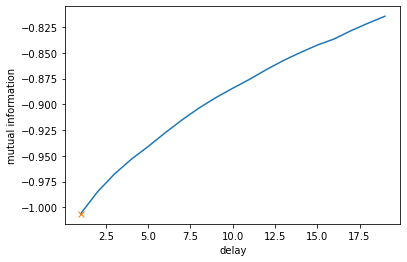

In [2]:
import numpy as np
import matplotlib.pyplot as plt #plotting
from mpl_toolkits.mplot3d import Axes3D #3d plots

mutual_information_per_delay = []
for i in range(1,20):
#     print(f"iteration {i}")
    mutual_information_per_delay = np.append(mutual_information_per_delay,[ct.compute_mutual_information(data, i, 50)])

local_min = [i 
             for i in range(1, len(mutual_information_per_delay) -1) 
                            if (mutual_information_per_delay[i] < mutual_information_per_delay[i-1]
                            and mutual_information_per_delay[i] < mutual_information_per_delay[i+1])]    
print(local_min)
if local_min:
    local_min_idx = [i + 1 for i in local_min]
else:
    local_min = [0]
    local_min_idx = [1]
plt.plot(range(1, 20), mutual_information_per_delay)
plt.plot(local_min_idx, mutual_information_per_delay[local_min], 'x')
plt.xlabel('delay')
plt.ylabel('mutual information')
delay = local_min_idx[0]
print(f"Delay {delay}")

Text(0, 0.5, 'Fraction of false neighbors')

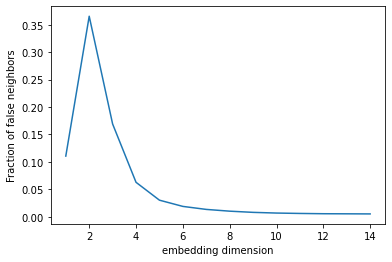

In [3]:
false_neighbors = []
for i in range(1,15):
    false_neighbors.append(ct.calculate_false_nearest_neighours(data, 1, i) / len(data))
plt.plot(range(1,15),false_neighbors)
plt.xlabel('embedding dimension')
plt.ylabel('Fraction of false neighbors')